## 1ª 

### a)

resposta: dentre as vantagens do modelo ARMA, podemos destacar que é um dos melhores modelos de previsão para séries estacionárias, uma junção do modelo auto-regressivo com o de médias moveis(que é facilmente implementável)

### b)

fonte: https://journals.ametsoc.org/doi/abs/10.1175/1520-0493%281981%29109%3C0479%3AOTUOAM%3E2.0.CO%3B2

## 2ª

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.tsa.api as smt 
from statsmodels.tsa.stattools import adfuller

from sklearn.linear_model import LinearRegression

from numpy import polyfit

from matplotlib.pylab import rcParams

import statsmodels.tsa.stattools as ts

import random as random

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

data_chuva = pd.read_excel('C:\\Users\\mcbsf\\Downloads\\correlation-master\\correlation-master\\chuva_fortaleza.xlsx')


In [3]:
data_chuva['Ano'] = pd.to_datetime(data_chuva['Ano'], format='%Y')
serie  = pd.Series(data_chuva['Milimetros'].values, index=data_chuva['Ano'])
serie = serie.astype('float32')

In [10]:
model = ts.ARMA(serie, (2,1))
model = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [ ]:
smt.graphics.plot_pacf(serie.dropna(), lags=24, alpha=0.05)

In [ ]:
plt.plot(serie.index, serie, label="original")

In [ ]:
smt.graphics.plot_pacf(model.fittedvalues, lags=24, alpha=0.05)

In [11]:
result = adfuller(serie)
print('ADF Statistic for original serie: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
result = adfuller(model.fittedvalues)
print('ADF Statistic for predicted serie: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic for original serie: -8.644058
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
ADF Statistic for predicted serie: -7.619073
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [23]:
print("kpss para serie original:")
print(ts.kpss(serie))
print("\nkpss para serie modelada:")
print(ts.kpss(model.fittedvalues))

kpss para serie original:
(0.09960813735964094, 0.1, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

 kpss para serie modelada:
(0.11525388011054717, 0.1, 13, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


## 3ª 

In [28]:
data_mortes = pd.read_excel('C:\\Users\\mcbsf\\Downloads\\correlation-master\\correlation-master\\morte_armas_australia.xlsx')
data_mortes['Year'] = pd.to_datetime(data_mortes['Year'], format='%Y')
serie_mortes  = pd.Series(data_mortes['taxa_mortes'].values, index=data_mortes['Year'])

In [40]:
model_mortes = ts.ARMA(serie_mortes, (4,1))
model_mortes = model_mortes.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


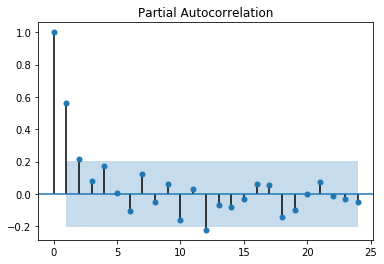

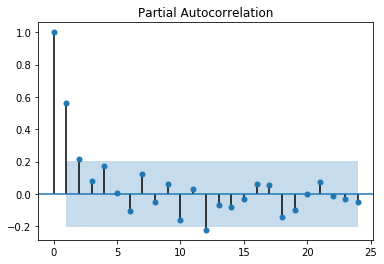

In [36]:
smt.graphics.plot_pacf(serie_mortes.dropna(), lags=24, alpha=0.05)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


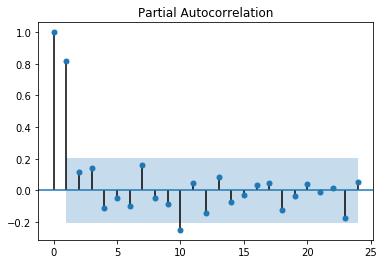

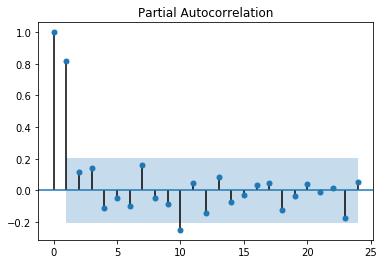

In [41]:
smt.graphics.plot_pacf(model_mortes.fittedvalues, lags=24, alpha=0.05)